<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_TimeSeries_AirPassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series  Analysis     

*from a [blog entry, Medium article](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000), and [GitHub repos](https://github.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-) entitled 'Time Series ARIMA' by Jacob Stallone, on November 9, 2019.*     

Data is courtesy of [Jacob Stallone's copy](https://github.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-/blob/master/AirPassengers.csv) of an [original Kaggle source](https://www.kaggle.com/datasets/chirag19/air-passengers).  


##Housekeeping: Import Modules, etc.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

https://matplotlib.org/users/customizing.html

The dataset is from kaggle , Let's explore it using a copy that Jacob Stallone posts on his GitHub.   Pull that file into the current working directory with `!curl` as follows.    


In [1]:
!curl "https://raw.githubusercontent.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-/master/AirPassengers.csv"  -o AirPassengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1746  100  1746    0     0  20785      0 --:--:-- --:--:-- --:--:-- 20541


###Read the dataset into a Pandas dataframe called `data`.

In [4]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


##Dataset Description 

The data contains a particular month and number of passengers travelling in that month. The data type here is object (month).     

Convert it into a Time series object and use the Month column as the index.    




Timestamps are useful objects for comparisons.     

Create a timestamp object with the `pd.to_datetime()` function and a string specifying the date. These timestamps are useful for logical filtering with dates.

In [5]:
from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

###Explore properties of the date-time based index

In [7]:
#1. Specify the index as a string constant:
ts['1949-01-01']

112

In [8]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [9]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [10]:
#2. Use ':' if one of the indices is at an end
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
#All rows of 1962:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

##**Stationarity**

*Some additional housekeeping to import plot converters*    

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

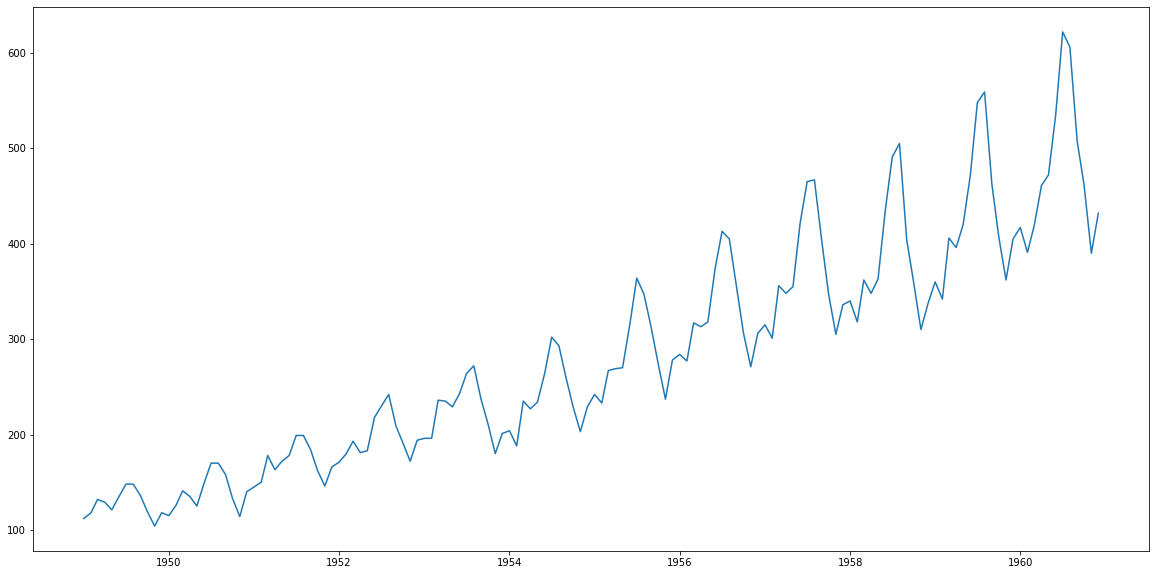

In [12]:
plt.figure(figsize=(20,10))
plt.plot(ts)

It’s clear from the plot that there is an overall increase in the trend and with some seasonality in it.

###Stationarity testing 

*Additional housekeeping to import adfuller from statsmodels to test stationarity*

In [15]:
from statsmodels.tsa.stattools import adfuller
    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Based on the deprecation waring in the execution of the last snippet, the following import or some derivative thereof may warrant exection.*

In [ ]:
import pandas.util.testing as tm

Create a function to perform various tests of stationarity.    


In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

    

Plot the tests of stationarity for the time series `ts` 

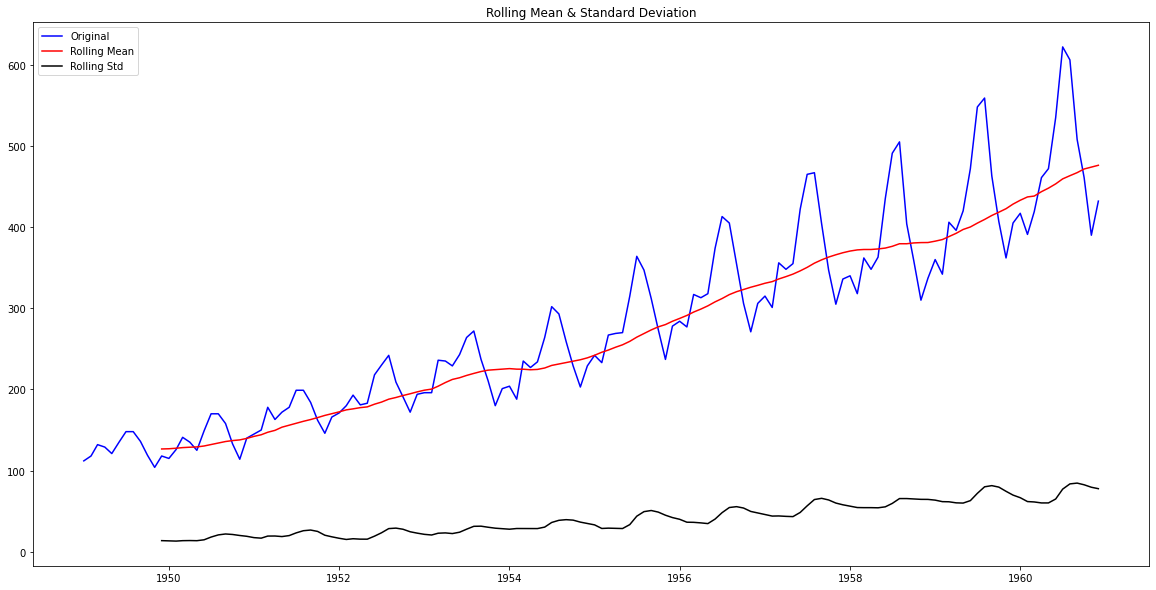

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
plt.figure(figsize=(20,10))
test_stationarity(ts)

###Transforming the Times Series for Stationarity    

####Trend Analysis 

Applying a `log()` function to dampen large values.    

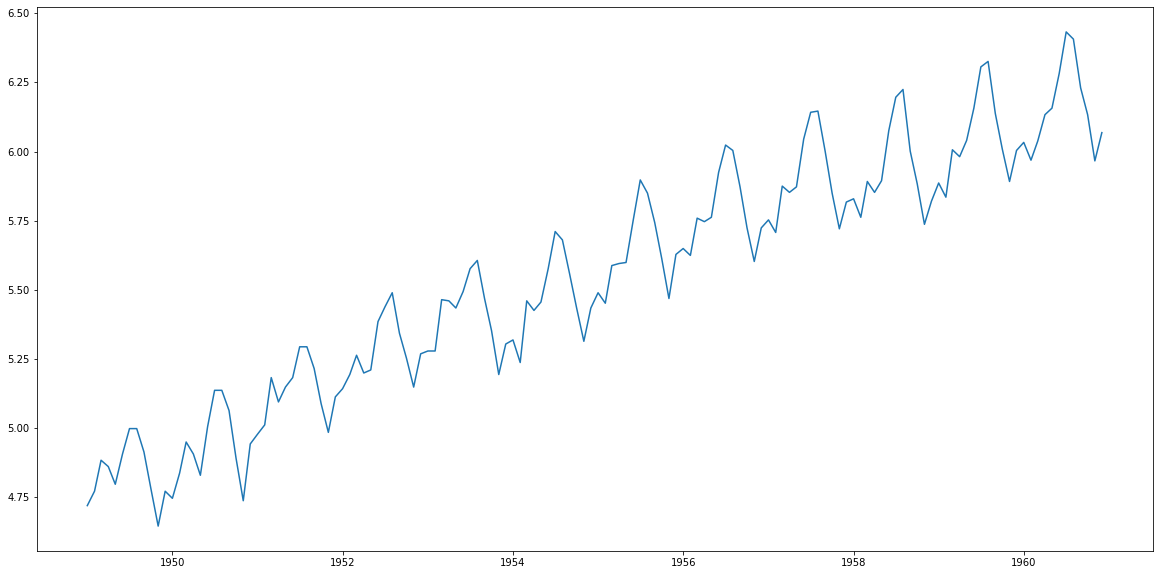

In [18]:
ts_log = np.log(ts)
plt.figure(figsize=(20,10))
plt.plot(ts_log)

###Smoothing the Series

####Applying a Moving Average    

Deriving a 12-month moving average of the data.     

*note that any moving average of `n` periods will result in the creation of `null` values for the first `n-1` periods.*    


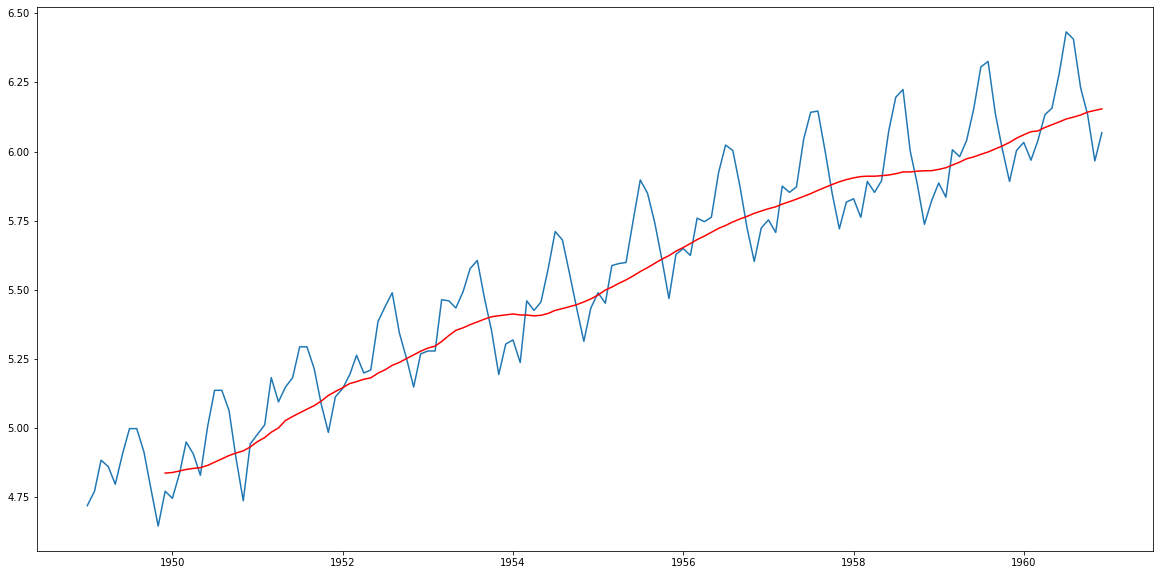

In [19]:
moving_avg = pd.Series(ts_log).rolling(12).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Calculating the period change in the moving average.    

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(13)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
Name: #Passengers, dtype: float64

Drop the `null` or `NaN` values which resulted from calculating `n` number of periods in the moving average.    


In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Invoke the `test_stationarity()` function defined earlier, using the newly calculated differences in the moving average of log function (`ts_log_moving_avg_diff`)    


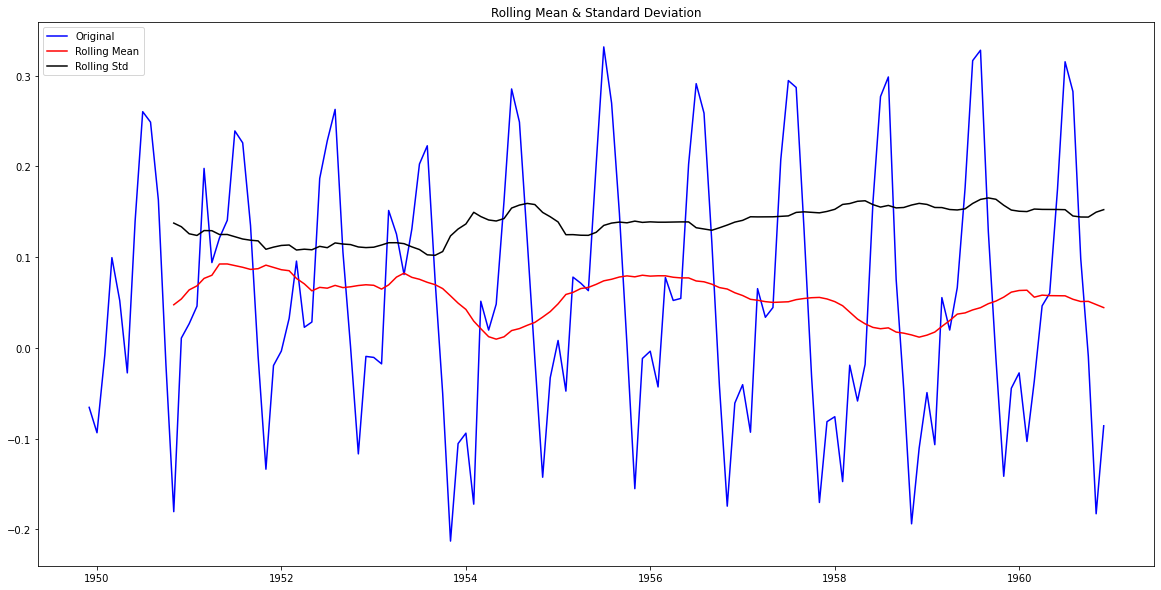

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
plt.figure(figsize=(20,10))
test_stationarity(ts_log_moving_avg_diff)

Calculated the exponentially-weighted moving average using the `ewm() method.

###### Exponentially weighted moving average

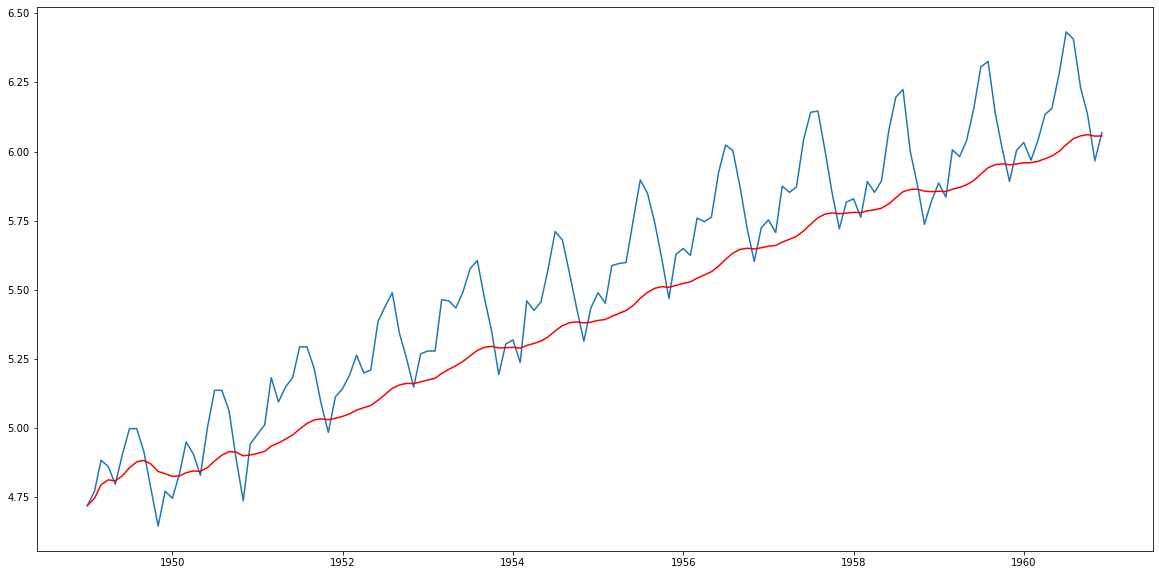

In [ ]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

Calculating the difference in the exponentially-weighted moving average from the log of the time series (`ts_log_ewma_diff`).

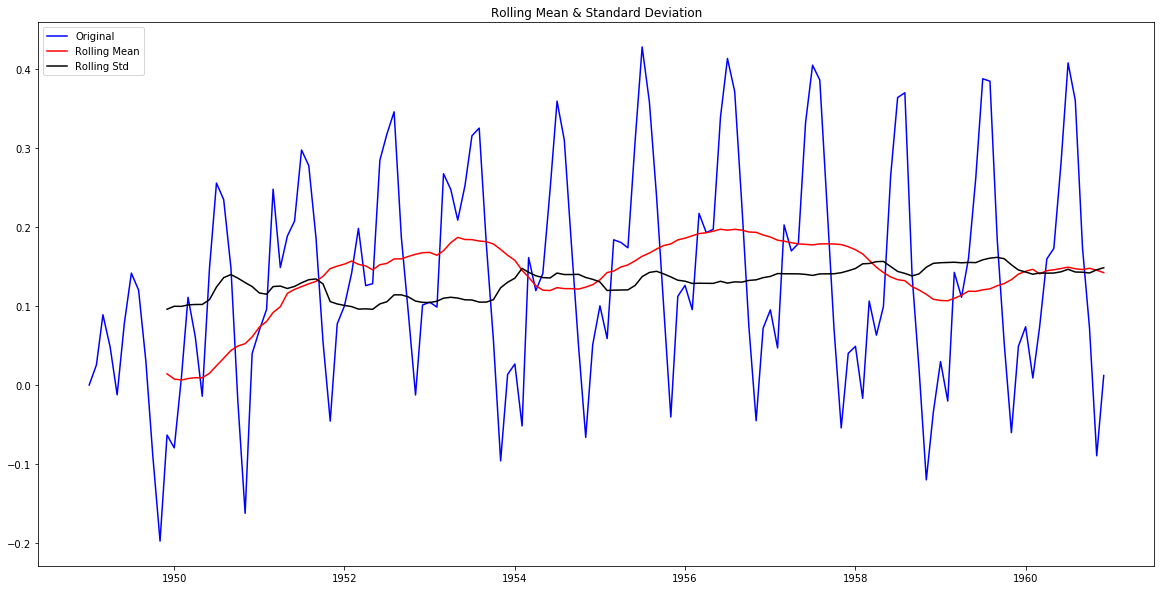

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
plt.figure(figsize=(20,10))
test_stationarity(ts_log_ewma_diff)

###Analyzing and Treating Seasonality      

**(Along with the Trend)**    



Calculating a difference based on a shift in period. 

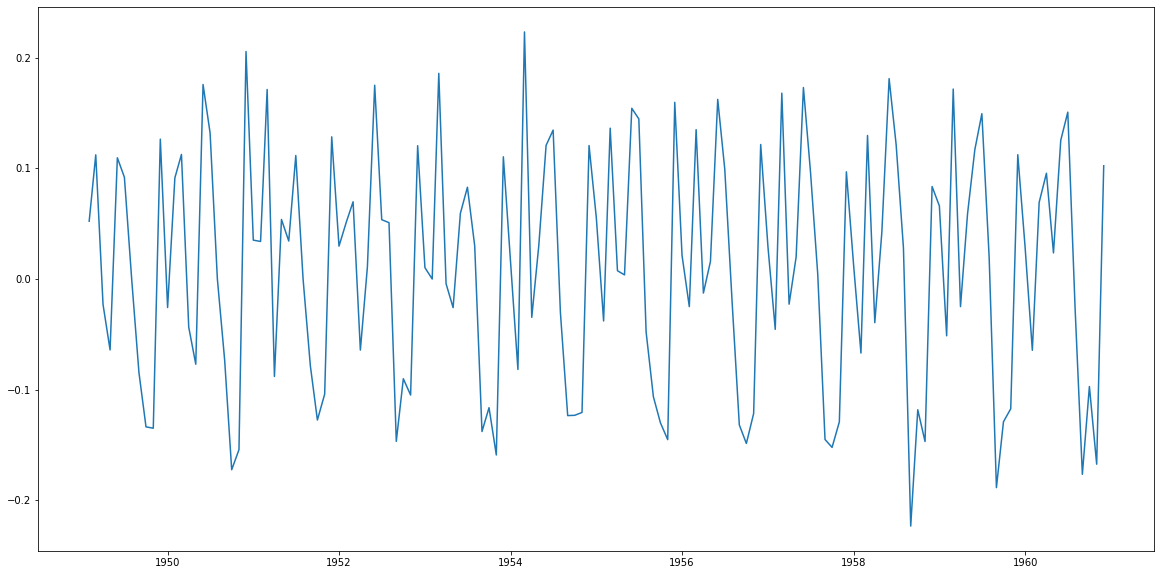

In [25]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)

In [26]:
ts_log_diff.isnull().sum()

1

Drop missing (`NaN`) values.    

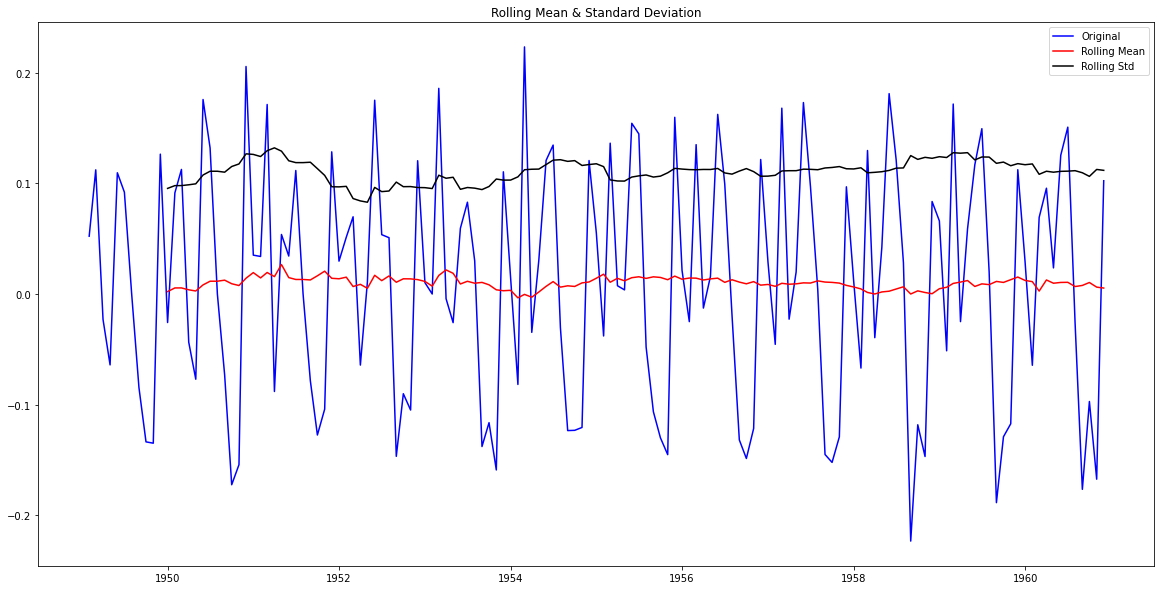

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [28]:
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(20,10))
test_stationarity(ts_log_diff)

*Additional housekeeping to import `seasonal_decompose` for analysis and treatment of seasonality.*    
 

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

Analyze a decomposition of the `trend`, it's `seasonal` component and the `residual` value.    


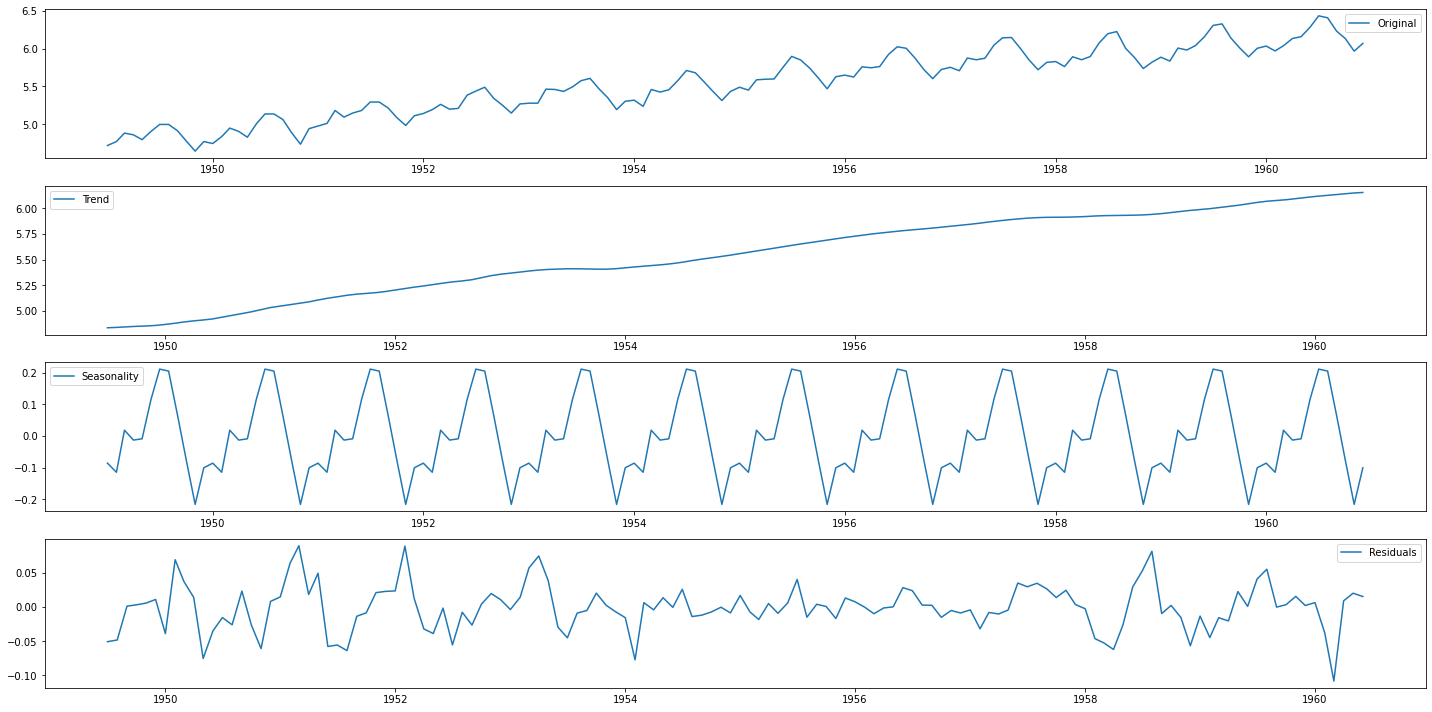

In [30]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Processing the seasonality residual values and invoking the `test_stationarity` function defined earlier using residuals (`ts_log_decompose`) as an argument.    


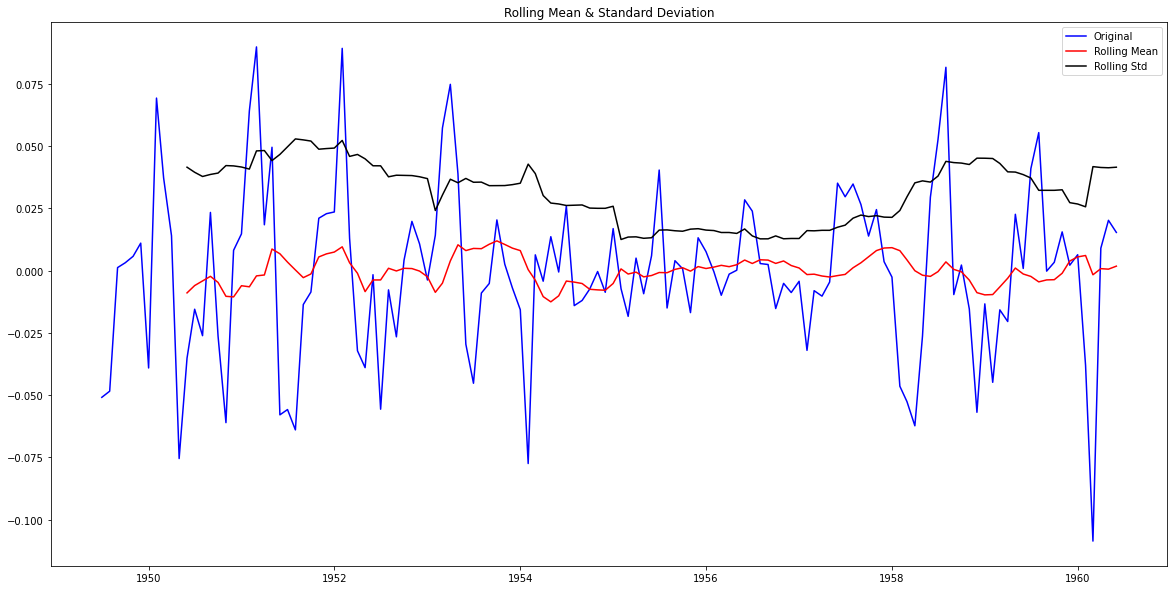

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [31]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.figure(figsize=(20,10))
test_stationarity(ts_log_decompose)

##Forecasting a Time Series (AR-I-MA) 

###ACF & PACF  

**About ACF and PACF**    


*from [Significance of ACF and PACF in Time Series Analysis, TowardDataScience](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8)*    



**ACF** is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.    


**PACF** is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.    



Additional housekeeping to import plot methods `plot_acf()` and `plot_pacf()`.   

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Plot of ACF, PACF for the difference in log of time series (`ts_log_diff`).      

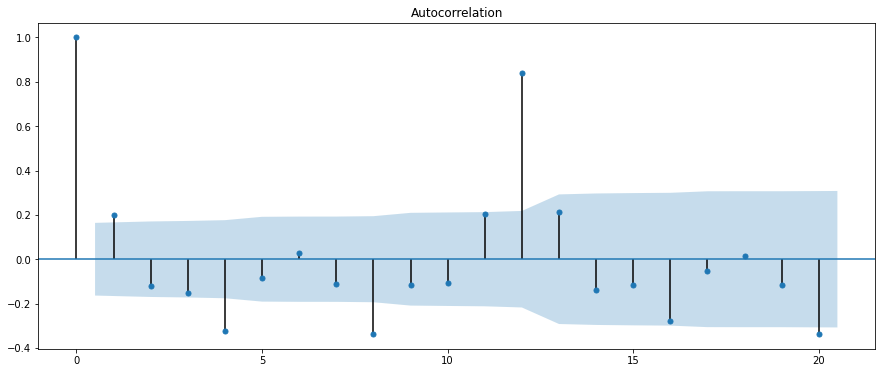

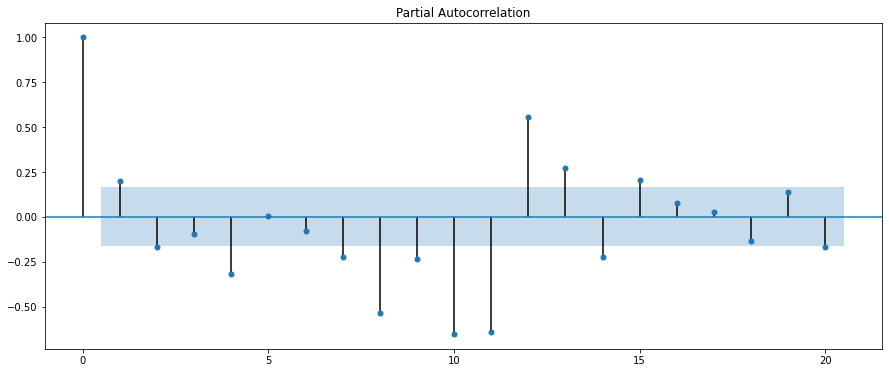

<Figure size 1440x720 with 0 Axes>

In [33]:
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)
plt.figure(figsize=(20,10))
plt.show()

Housekeeping to import `ARIMA` for Auto-Regressive in Moving Average analysis.    


In [34]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


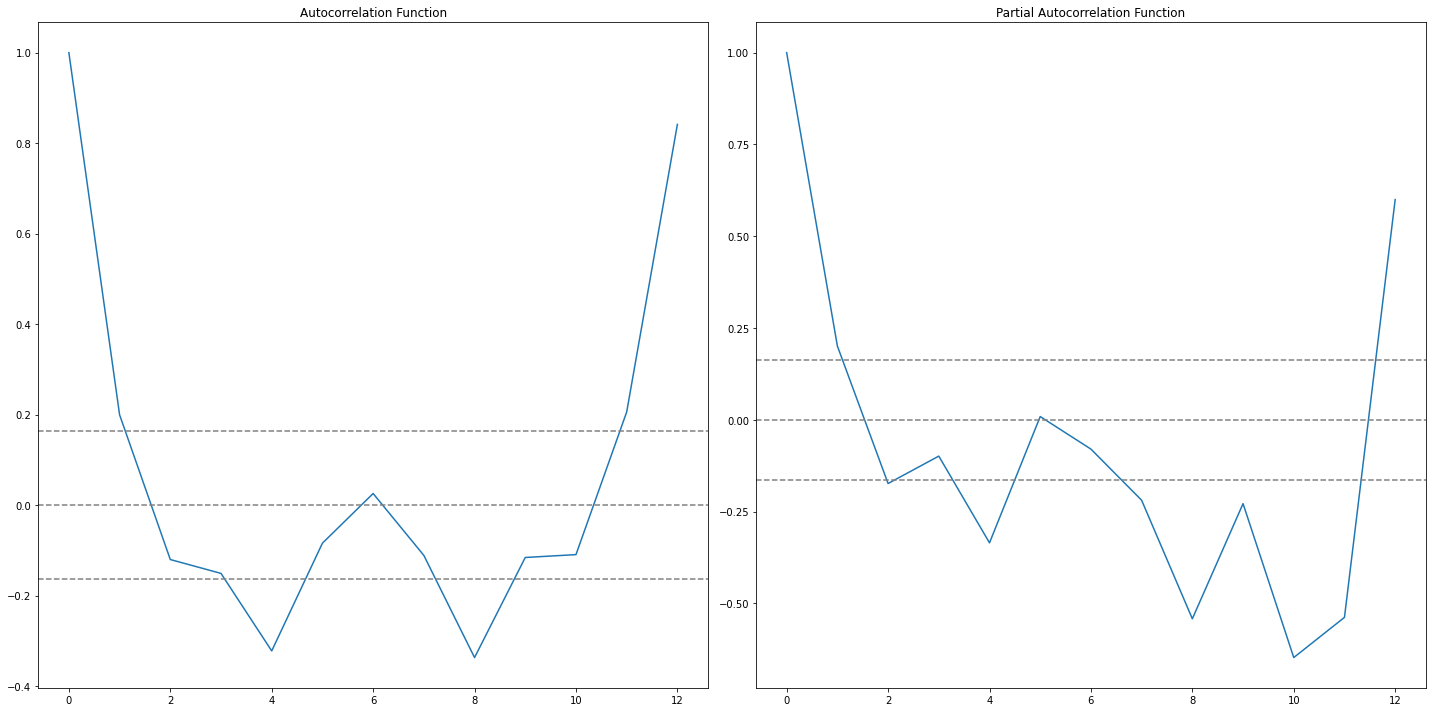

In [35]:

lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

plt.figure(figsize=(20,10))
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

###**Auto-Regressive Model**   


**Auto regressive (AR) process** - a time series is said to be AR when present value of the time series can be obtained using previous values of the same time series i.e the present value is weighted average of its past values. Stock prices and global temperature rise can be thought of as an AR processes.    




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

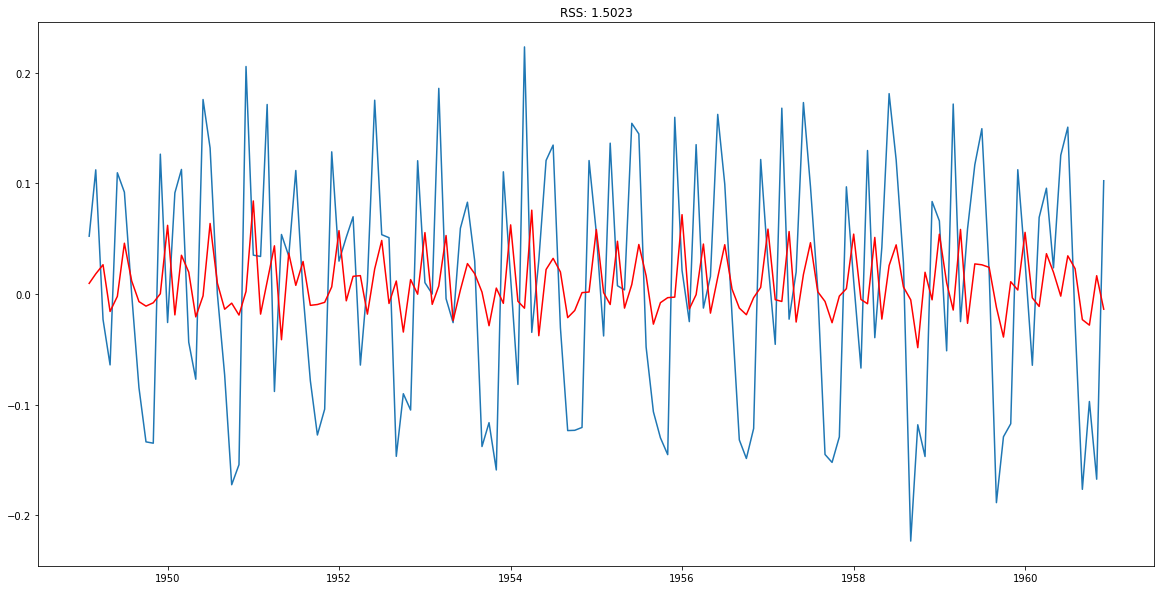

In [36]:
#AR model
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

###**Moving Average Model**    

**Moving average (MA) process** -  a process where the present value of series is defined as a linear combination of past errors. We assume the errors to be independently distributed with the normal distribution.     


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

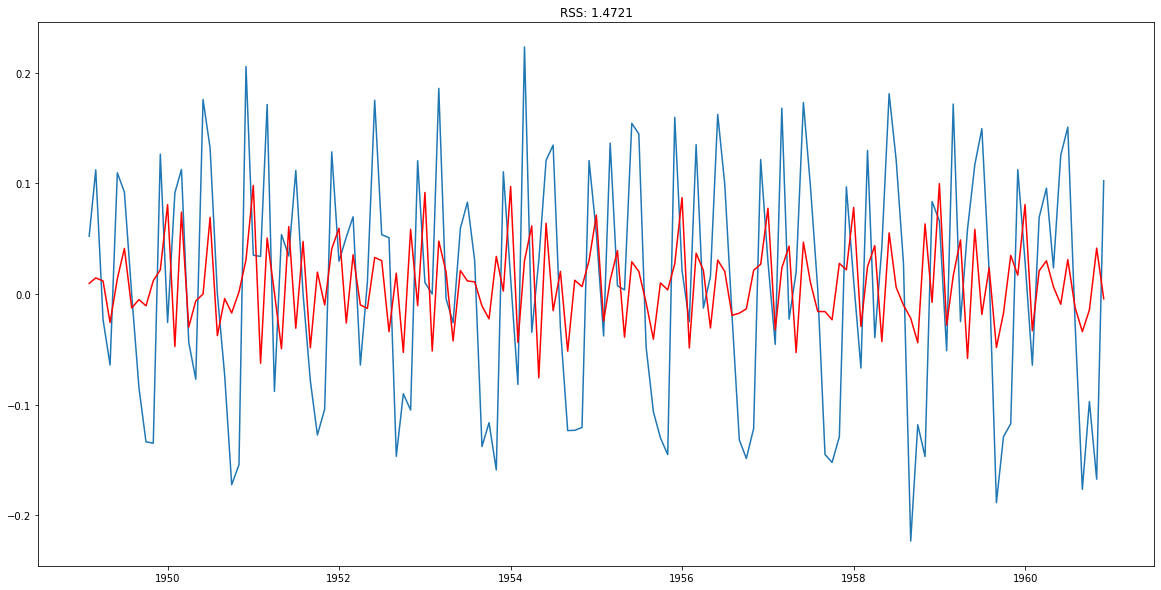

In [37]:
#MA model
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

**Auto-Regressive in Moving Average Model**    


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

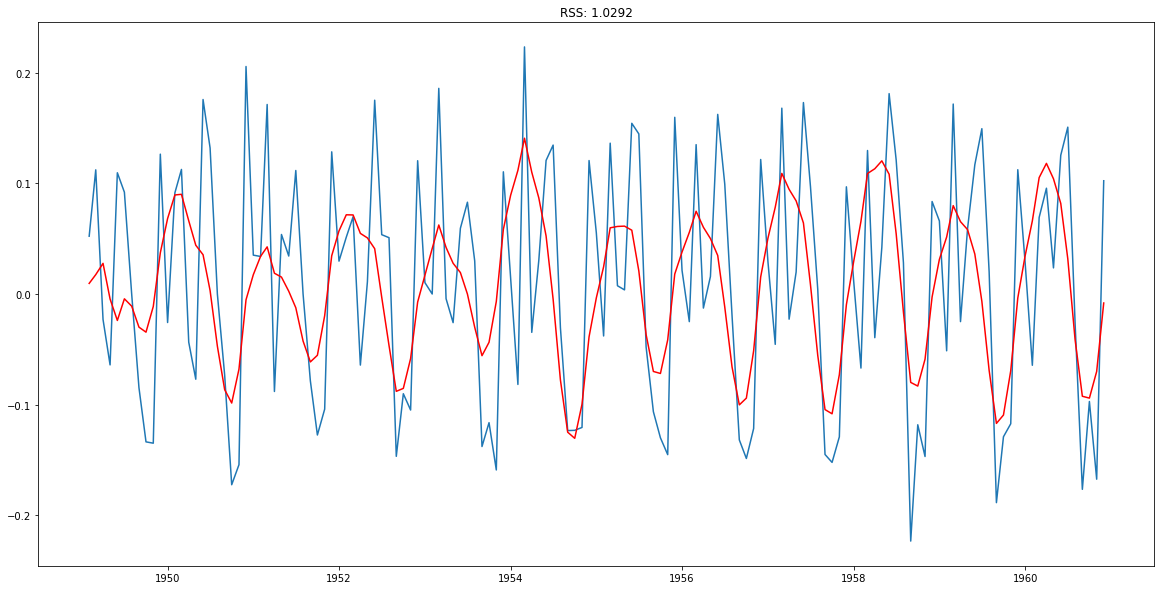

In [38]:
#ARIMA model
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

**Calculated Targets (Predictions)**    


In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [40]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1047')

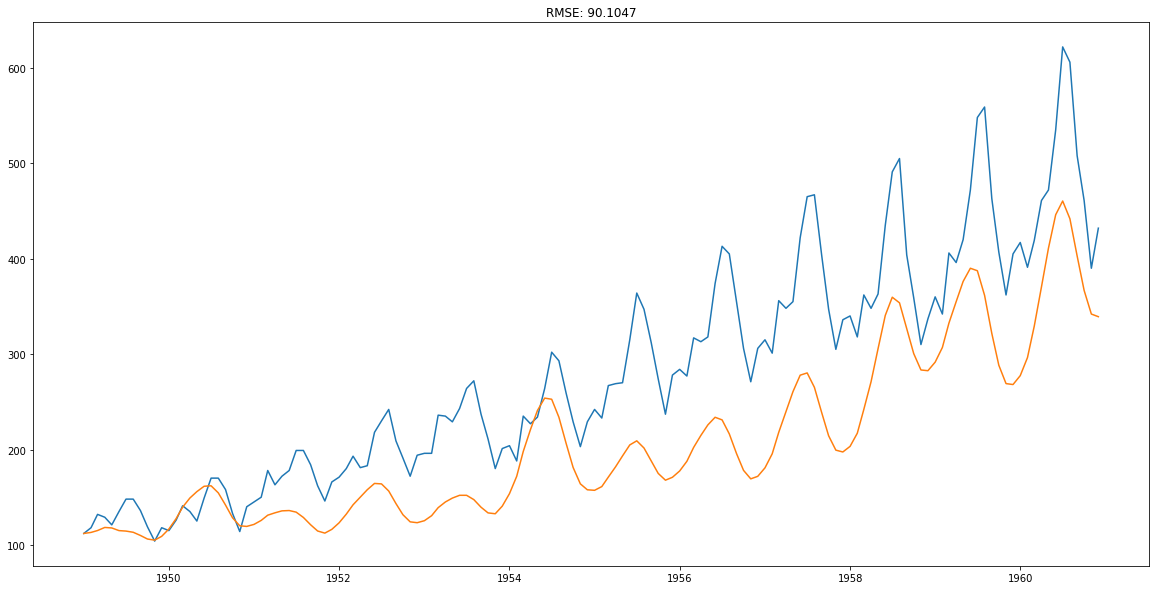

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))

**Forecasting with 95% Confidence**    


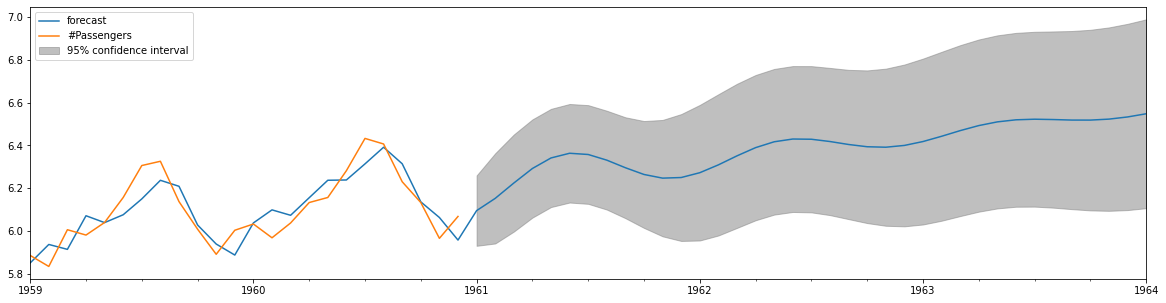

In [43]:
fig, ax = plt.subplots(figsize=(20,5))
fig = results_ARIMA.plot_predict(start='1959-01-01', end='1964-01-01',ax=ax)
legend = ax.legend(loc='upper left')
plt.show()

###Forecast for next 12 months

Use ARIMA to forecast 12 periods and raise values using `np.exp()` then populate a dataframe (`prediction_df`) with those forecasted values.    


In [44]:
results = results_ARIMA.forecast(steps = 12)
converted_results = [(np.exp(x)) for x in [i for i in results]]
prediction_df = pd.DataFrame(converted_results)
prediction_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,443.87096,470.038182,504.934884,540.454668,567.730527,580.327937,577.002535,561.938799,542.384635,525.566756,516.659139,518.143258
1,1.087463,1.113485,1.122644,1.124151,1.124159,1.124614,1.124819,1.125005,1.127769,1.135826,1.14879,1.163215
2,"[376.6048779636411, 523.1515586046879]","[380.74444679445196, 580.2734467227034]","[402.49687334156175, 633.4440189712076]","[429.67997966908473, 679.7878934681155]","[451.35883767962724, 714.1057710707918]","[461.00779546024154, 730.5310620318804]","[458.2023603557147, 726.6045627827144]","[446.096154411529, 707.8635646075165]","[428.5066439534584, 686.5263263291713]","[409.4666458470782, 674.5858738026005]","[393.67181934051024, 678.0690234746929]","[385.2640612390825, 696.8530487140158]"




---

